In [55]:
# Importing liberaries and functions file
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from functions import all_functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats

In [3]:
api_key = os.environ.get('YOUTUBE_API')
channel_ids = ['UC5I2hjZYiW9gZPVkvzM8_Cw',  #Techmoan
              'UCY1kMZp36IQSyNx_9h4mpCg',   #Mark Rober
              'UCBJycsmduvYEL83R_U4JriQ',   #MKBHD
              'UCzlXf-yUIaOpOjEjPrOO9TA',   #The Tech Chap
              'UC4Tklxku1yPcRIH0VVCKoeA'    #Quantum Tech HD
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

## Function to get channel statistics

In [4]:
# Getting stats of desired channels from all_functions class from functions.py file

channel_stats = pd.DataFrame(all_functions.get_chanel_stats(youtube, channel_ids))
channel_stats

,channel_name,Geographical_area,Channel_views,Channel_subscribers,Channel_videos,playlist_id
0,Marques Brownlee,US,3611463956,17200000,1565,UUBJycsmduvYEL83R_U4JriQ
1,The Tech Chap,GB,340579547,1390000,982,UUzlXf-yUIaOpOjEjPrOO9TA
2,Quantum Tech HD,ES,4343696821,12500000,479,UU4Tklxku1yPcRIH0VVCKoeA
3,Mark Rober,US,3639397634,24600000,120,UUY1kMZp36IQSyNx_9h4mpCg
4,Techmoan,GB,315697491,1310000,600,UU5I2hjZYiW9gZPVkvzM8_Cw


In [5]:
# creating a csvfile named channel_stats_george.csv for visualization
file_path = 'D:\Bootcamp\Projects\LHL_Mid-Term Project\DataFrames\channel_stats_george.csv'
channel_stats.to_csv(file_path, index = False)


Changing datatypes to more appropriate types for visualization

In [6]:
channel_stats.dtypes 

channel_name           object
Geographical_area      object
Channel_views          object
Channel_subscribers    object
Channel_videos         object
playlist_id            object
dtype: object

In [7]:
channel_stats['Channel_subscribers'] = pd.to_numeric(channel_stats['Channel_subscribers']) # Object to int
channel_stats['Channel_views'] = pd.to_numeric(channel_stats['Channel_views'])             # Object to int 
channel_stats['Channel_videos'] = pd.to_numeric(channel_stats['Channel_videos'])           # Object to int
channel_stats.dtypes

channel_name           object
Geographical_area      object
Channel_views           int64
Channel_subscribers     int64
Channel_videos          int64
playlist_id            object
dtype: object

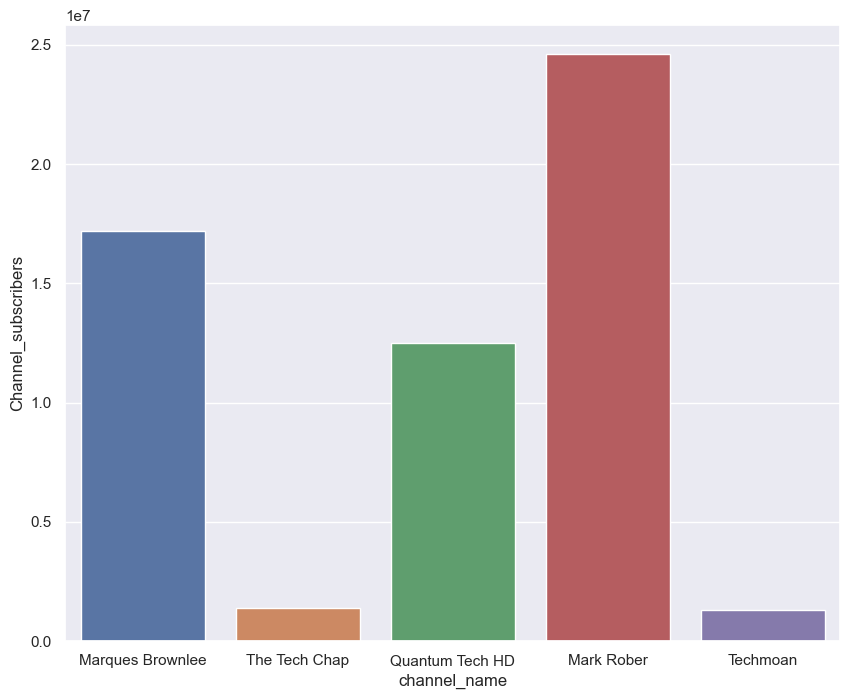

In [8]:
sns.set(rc={'figure.figsize': (10,8)}) # Graph design set
ax = sns.barplot(x='channel_name', y='Channel_subscribers', data=channel_stats) # Creating graph for channel_subscribers

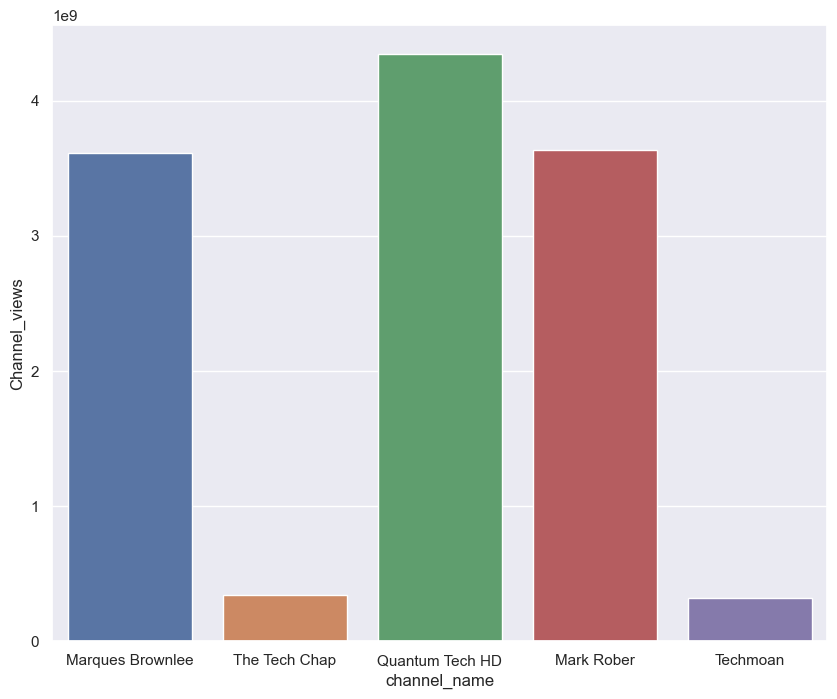

In [9]:
ax = sns.barplot(x='channel_name', y='Channel_views', data=channel_stats) # Creating a graph for Channel_views

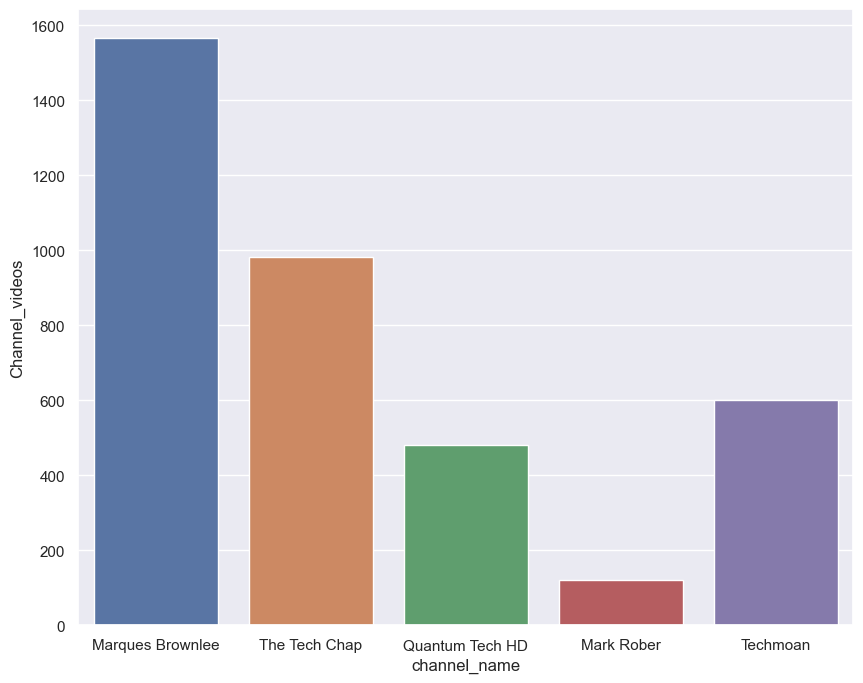

In [10]:
ax = sns.barplot(x='channel_name', y='Channel_videos', data=channel_stats) # Creating graph for Channel_videos

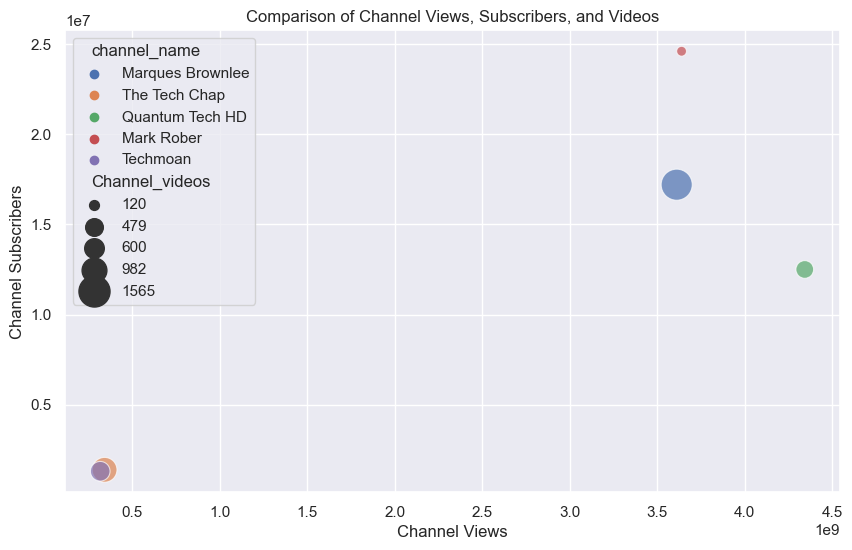

In [11]:
# Set the style for the plot
sns.set(style='darkgrid')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bubble chart
sns.scatterplot(data=channel_stats, x='Channel_views', y='Channel_subscribers', size='Channel_videos', sizes=(50, 500),
                hue='channel_name', alpha=0.7)

# Set the labels and title of the plot
plt.xlabel('Channel Views')
plt.ylabel('Channel Subscribers')
plt.title('Comparison of Channel Views, Subscribers, and Videos')

# Show the plot
plt.show()

#### Conclusion

1. 'MKBHD' has higest videos, around same amount of views then 'Mark Rober'

2. 'The Tech Chap' and 'Techmoan' have lowest views and subs with videos around 600 to 1000.

3. 'Mark Rober' has higest subs with lowest amount of videoes and views are almost the same as 'MKBHD'

4. 'Quantum Tech HD' has higest views with litttle bit less amount of subscribers then 'MKBHD'


# Analyzing MKBHD

In [15]:
# Getting playlist id for MKBHD.
playlist_id = channel_stats.loc[channel_stats['channel_name'] == 'Marques Brownlee','playlist_id'].iloc[0]
playlist_id

'UUBJycsmduvYEL83R_U4JriQ'

In [16]:
# calling out function get_video_ides from functions.py
# getting information of 'MKBHD'Channel

all_functions.get_video_ids(youtube, playlist_id)
video_ids = all_functions.get_video_ids(youtube, playlist_id)

In [17]:
video_ids #taking sample of 50 ids to analyze key values of a dict

{'kind': 'youtube#playlistItemListResponse',
 'etag': '11NEB5qzKFBRqK1SY1s57VU1v4o',
 'nextPageToken': 'EAAaBlBUOkNESQ',
 'items': [{'kind': 'youtube#playlistItem',
   'etag': 'OWwEium-G_cnLSnnxUH82el6j9Y',
   'id': 'VVVCSnljc21kdXZZRUw4M1JfVTRKcmlRLjVMV0RsNXFhUWJB',
   'contentDetails': {'videoId': '5LWDl5qaQbA',
    'videoPublishedAt': '2023-07-14T16:39:30Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'bA3CGNwRHqB3sZcxDpHHXI98bq0',
   'id': 'VVVCSnljc21kdXZZRUw4M1JfVTRKcmlRLmxSVXRIdHFmQ0dB',
   'contentDetails': {'videoId': 'lRUtHtqfCGA',
    'videoPublishedAt': '2023-07-13T15:34:54Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'qK8xOcuEWpV8AwMSehM_xpK8AK0',
   'id': 'VVVCSnljc21kdXZZRUw4M1JfVTRKcmlRLmJEdHVWcDF5d1Rv',
   'contentDetails': {'videoId': 'bDtuVp1ywTo',
    'videoPublishedAt': '2023-07-12T18:52:40Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'J_EcDIhhmhipu8A_QTQURsdzOHM',
   'id': 'VVVCSnljc21kdXZZRUw4M1JfVTRKcmlRLjZhSzQwN1NUc0dB',
   'contentDetails': {'v

In [19]:
video_ids = all_functions.get_video_ids_all(youtube, playlist_id)
video_ids # Getting just the video ids of all the videos

['5LWDl5qaQbA',
 'lRUtHtqfCGA',
 'bDtuVp1ywTo',
 '6aK407STsGA',
 'wpBu5ej7m8g',
 'RM7SobH8ZO0',
 'w2KbwC-s7pY',
 'PhFwDJCEhBg',
 'FNnK1J-BdiM',
 'aTf7AMVOoDY',
 'kvN5_GXlg2Y',
 '1TCuf_Qcfv8',
 'tciqW8VKfOU',
 'OFvXuyITwBI',
 'PCp1BmME6QA',
 '8om1eJrO2lU',
 '03OZsmDV56k',
 'UXB9bnuyZb4',
 'J1oEWiUsKgU',
 'tFdnCzfJPJ0',
 'DO1PJYAQj0c',
 '-6AEpecXg-4',
 'zxDTitg2MeE',
 'LRJPk9BmJY4',
 'cTxJ5oLuxkM',
 'REVveXIMk7c',
 '1eI8HpJtq-s',
 '-BwUyTrU9fo',
 'K6gtEGnbR6I',
 'OkLOJapGjC4',
 'wR-0knMVSGw',
 'HKvo6acp5aI',
 'AFthdsIcOxw',
 '17VcGk_-Ghc',
 'KG6Nu72Avqg',
 'O-buiiyp_xU',
 '4PZSB9bV1Zg',
 'b7zBJNmdImo',
 'NEZSa5NEREs',
 'A18BST27Wpw',
 '1afpDuTb-P0',
 'a01edYZIfjc',
 'bi1XS6s1rBY',
 'mv9afG2Dm9I',
 'W9_NAXd6VyE',
 'eUh1Cf5MjLY',
 '2m_y5d68xMM',
 'nmwJzPPgjpw',
 '7emz4zZ226E',
 'zhoTX0RRXPQ',
 '3yEP4ooj1WI',
 '6P1VRs68Cqo',
 'gyXjazZnJAU',
 'bMLbnsKGRfo',
 'va6QudutbAY',
 '9kxTOxDGLqs',
 'gvqZCMGjh3s',
 '7V_XEgSjrM0',
 'cneoANZKBGk',
 'tmGDx9hVWwo',
 'DUp3P12lZQM',
 '1xiqOg1NRPA',
 'jl8bTi

In [20]:
len(video_ids) # The length is equals to total video of 'MKBHD'

1562

# Video stats

In [21]:
all_functions.get_video_details(youtube, video_ids) #gettting 50 sample to analyse key values for creating a table

{'kind': 'youtube#videoListResponse',
 'etag': '9abliBArAhc_yanz1ftAtwnU6LQ',
 'items': [{'kind': 'youtube#video',
   'etag': 'Gyeunfvs_ooUeyMpRAOzCpcNEmM',
   'id': '5LWDl5qaQbA',
   'snippet': {'publishedAt': '2023-07-14T16:39:30Z',
    'channelId': 'UCBJycsmduvYEL83R_U4JriQ',
    'title': 'iOS 17 Hands-On: Top 5 Features!',
    'description': "iOS 17, coming soon to an iPhone near you\n\nWhen Apple is a shark: https://youtu.be/qNAo0UdYF6g\n\nMKBHD Merch: http://shop.MKBHD.com\n\nTech I'm using right now: https://www.amazon.com/shop/MKBHD\n\nIntro Track: http://youtube.com/20syl\nPlaylist of MKBHD Intro music: https://goo.gl/B3AWV5\n\n~\nhttp://twitter.com/MKBHD\nhttp://instagram.com/MKBHD\nhttp://facebook.com/MKBHD\n\n0:00 There's a theme here\n1:18 NameDrop\n3:42 Personal Voice\n6:00 The Little Things\n7:38 Standby Mode\n9:48 The Phone",
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/5LWDl5qaQbA/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'

In [39]:
# Some of the videos have no likes, views and comments. This functions identifies them and return statistics of all the vides and videos with no attributes.
def get_video_details_all(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title=video['snippet']['title'],
                               Published_date=video['snippet']['publishedAt'],
                               Views=video['statistics'].get('viewCount', 0),
                               Likes=video['statistics'].get('likeCount', 0),
                               Comments=video['statistics'].get('commentCount', 0)
                               )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [40]:
video_details = get_video_details_all(youtube, video_ids)
video_details

[{'Title': 'iOS 17 Hands-On: Top 5 Features!',
  'Published_date': '2023-07-14T16:39:30Z',
  'Views': '124741',
  'Likes': '7990',
  'Comments': '635'},
 {'Title': 'Nothing Phone 2 Review: A Real Personality!',
  'Published_date': '2023-07-13T15:34:54Z',
  'Views': '1439930',
  'Likes': '63884',
  'Comments': '3086'},
 {'Title': 'iOS 17\'s "Personal Voice" Feature!',
  'Published_date': '2023-07-12T18:52:40Z',
  'Views': '705874',
  'Likes': '46439',
  'Comments': '764'},
 {'Title': 'This Phone is Nearly Perfect!',
  'Published_date': '2023-07-07T19:25:08Z',
  'Views': '3076790',
  'Likes': '122780',
  'Comments': '5950'},
 {'Title': 'The $600,000 Diamond iPhone 💎',
  'Published_date': '2023-07-06T16:42:51Z',
  'Views': '692506',
  'Likes': '38471',
  'Comments': '944'},
 {'Title': 'Dope Tech: Nothing Phone 2 Redesign!',
  'Published_date': '2023-07-03T19:00:23Z',
  'Views': '3494180',
  'Likes': '136280',
  'Comments': '4271'},
 {'Title': 'Why Does the M2 Mac Pro Exist?',
  'Published

In [42]:
# Simple counter to count how many titles has N/A attributes.

# Initialize counters
na_views_count = 0
na_likes_count = 0
na_comments_count = 0

# Iterate through video details
for video in video_details:
    if video['Views'] == 0:
        na_views_count += 1
    if video['Likes'] == 0:
        na_likes_count += 1
    if video['Comments'] == 0:
        na_comments_count += 1

# Print the counts
print("Number of videos with zero views:", na_views_count)
print("Number of videos with zero likes:", na_likes_count)
print("Number of videos with zero comments:", na_comments_count)

Number of videos with zero views: 7
Number of videos with zero likes: 13
Number of videos with zero comments: 19


In [43]:
video_data = pd.DataFrame(video_details) # Creating a data frame
video_data.head(10)

,Title,Published_date,Views,Likes,Comments
0,iOS 17 Hands-On: Top 5 Features!,2023-07-14T16:39:30Z,124741,7990,635
1,Nothing Phone 2 Review: A Real Personality!,2023-07-13T15:34:54Z,1439930,63884,3086
2,"iOS 17's ""Personal Voice"" Feature!",2023-07-12T18:52:40Z,705874,46439,764
3,This Phone is Nearly Perfect!,2023-07-07T19:25:08Z,3076790,122780,5950
4,"The $600,000 Diamond iPhone 💎",2023-07-06T16:42:51Z,692506,38471,944
5,Dope Tech: Nothing Phone 2 Redesign!,2023-07-03T19:00:23Z,3494180,136280,4271
6,Why Does the M2 Mac Pro Exist?,2023-06-28T20:15:56Z,1948698,70971,3032
7,Google Pixel Fold Review: Maybe Next Year!,2023-06-26T17:01:16Z,2379411,76199,3777
8,The World's Largest iPhone Has a Secret...,2023-06-22T04:03:29Z,11146366,704582,3152
9,Pixel Tablet Review: Is Google Back?!,2023-06-20T11:47:24Z,2477993,77728,4323


In [44]:
# Adding youtuber's name for model building
video_data['Youtuber'] = "mkbhd"

# Rearrange the columns
video_data = video_data[['Youtuber', 'Title', 'Published_date', 'Views', 'Likes', 'Comments']]

video_data

,Youtuber,Title,Published_date,Views,Likes,Comments
0,mkbhd,iOS 17 Hands-On: Top 5 Features!,2023-07-14T16:39:30Z,124741,7990,635
1,mkbhd,Nothing Phone 2 Review: A Real Personality!,2023-07-13T15:34:54Z,1439930,63884,3086
2,mkbhd,"iOS 17's ""Personal Voice"" Feature!",2023-07-12T18:52:40Z,705874,46439,764
3,mkbhd,This Phone is Nearly Perfect!,2023-07-07T19:25:08Z,3076790,122780,5950
4,mkbhd,"The $600,000 Diamond iPhone 💎",2023-07-06T16:42:51Z,692506,38471,944
...,...,...,...,...,...,...
1557,mkbhd,Fraps HD Test in 1080p (18 WOS),2009-01-01T22:30:32Z,137906,1672,236
1558,mkbhd,HP Pavilion dv7t Media Center Remote Overview,2009-01-01T19:43:47Z,4752762,237456,36686
1559,mkbhd,High fps LG Voyager footage,2008-09-16T01:33:42Z,191737,2817,726
1560,mkbhd,14 Year knock-down shot (11 Handicap),2008-05-30T20:27:17Z,184448,2353,366


In [45]:
# Creating a csvfile
file_path = "D:/Bootcamp/Projects/LHL_Mid-Term Project/DataFrames/video_data_george.csv"
video_data.to_csv(file_path, index = False)

Changing data types to more appropriate types

In [46]:
video_data.dtypes

Youtuber          object
Title             object
Published_date    object
Views             object
Likes             object
Comments          object
dtype: object

In [50]:
video_data['Views'] = pd.to_numeric(video_data['Views']) # Object to int
video_data['Likes'] = pd.to_numeric(video_data['Likes']) # Object to int
video_data['Comments'] = pd.to_numeric(video_data['Comments']) # Object to int
video_data

,Youtuber,Title,Published_date,Views,Likes,Comments
0,mkbhd,iOS 17 Hands-On: Top 5 Features!,2023-07-14,124741,7990,635
1,mkbhd,Nothing Phone 2 Review: A Real Personality!,2023-07-13,1439930,63884,3086
2,mkbhd,"iOS 17's ""Personal Voice"" Feature!",2023-07-12,705874,46439,764
3,mkbhd,This Phone is Nearly Perfect!,2023-07-07,3076790,122780,5950
4,mkbhd,"The $600,000 Diamond iPhone 💎",2023-07-06,692506,38471,944
...,...,...,...,...,...,...
1557,mkbhd,Fraps HD Test in 1080p (18 WOS),2009-01-01,137906,1672,236
1558,mkbhd,HP Pavilion dv7t Media Center Remote Overview,2009-01-01,4752762,237456,36686
1559,mkbhd,High fps LG Voyager footage,2008-09-16,191737,2817,726
1560,mkbhd,14 Year knock-down shot (11 Handicap),2008-05-30,184448,2353,366


In [51]:
video_data.dtypes

Youtuber          object
Title             object
Published_date    object
Views              int64
Likes              int64
Comments           int64
dtype: object

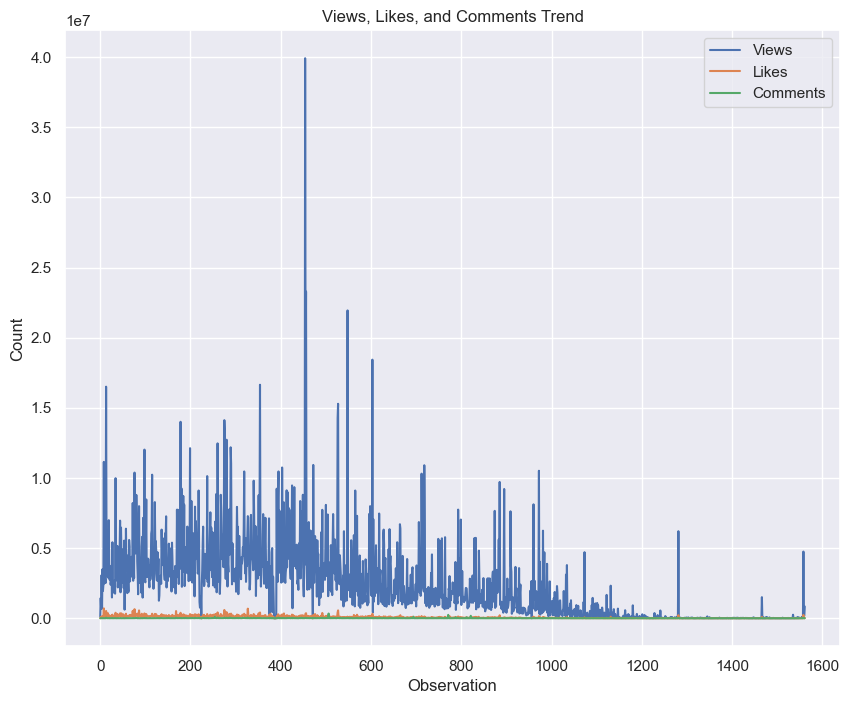

In [52]:
# Trend line graph for Views, Likes and Comments

views = video_data['Views']
likes = video_data['Likes']
comments = video_data['Comments']

plt.plot(views, label='Views')
plt.plot(likes, label='Likes')
plt.plot(comments, label='Comments')

# Set plot title and labels
plt.title('Views, Likes, and Comments Trend')
plt.xlabel('Observation')
plt.ylabel('Count')

# Add legend
plt.legend()

# Display the plot
plt.show()

# Regression model

In [53]:
# Convert the 'Published_date' column to datetime type
video_data['Published_date'] = pd.to_datetime(video_data['Published_date'])

# Extract the year and month from the 'Published_date' column
video_data['Year'] = video_data['Published_date'].dt.year
video_data['Month'] = video_data['Published_date'].dt.month

# Display the updated DataFrame
video_data.head(10)

,Youtuber,Title,Published_date,Views,Likes,Comments,Year,Month
0,mkbhd,iOS 17 Hands-On: Top 5 Features!,2023-07-14,124741,7990,635,2023,7
1,mkbhd,Nothing Phone 2 Review: A Real Personality!,2023-07-13,1439930,63884,3086,2023,7
2,mkbhd,"iOS 17's ""Personal Voice"" Feature!",2023-07-12,705874,46439,764,2023,7
3,mkbhd,This Phone is Nearly Perfect!,2023-07-07,3076790,122780,5950,2023,7
4,mkbhd,"The $600,000 Diamond iPhone 💎",2023-07-06,692506,38471,944,2023,7
5,mkbhd,Dope Tech: Nothing Phone 2 Redesign!,2023-07-03,3494180,136280,4271,2023,7
6,mkbhd,Why Does the M2 Mac Pro Exist?,2023-06-28,1948698,70971,3032,2023,6
7,mkbhd,Google Pixel Fold Review: Maybe Next Year!,2023-06-26,2379411,76199,3777,2023,6
8,mkbhd,The World's Largest iPhone Has a Secret...,2023-06-22,11146366,704582,3152,2023,6
9,mkbhd,Pixel Tablet Review: Is Google Back?!,2023-06-20,2477993,77728,4323,2023,6


In [54]:
video_data.dtypes

Youtuber                  object
Title                     object
Published_date    datetime64[ns]
Views                      int64
Likes                      int64
Comments                   int64
Year                       int64
Month                      int64
dtype: object

In [56]:
# Outlier removal

# variables for which I want to remove outliers
variables = ['Views', 'Likes', 'Comments']

# Compute z-scores for each variable
z_scores = stats.zscore(video_data[variables])

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Find the indices of outliers for each variable
outlier_indices = (z_scores > threshold).any(axis=1)

# Remove the outliers from the DataFrame
df_cleaned = video_data[~outlier_indices]

# Continue with model building using the cleaned dataset

In [61]:
# Extract the features and target variable
X = video_data[['Likes', 'Comments', 'Year', 'Month']] # Independent variable
y = video_data['Views']  # Dependent variable

# Split the data into training and testing sets (using 20% for sample)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

# Print the model's performance
print("Train R-squared score:", train_score)
print("Test R-squared score:", test_score)

Train R-squared score: 0.6682749639761905
Test R-squared score: 0.7042997370075514


- R-squared score measures how well independent variables explain variance in the dependent variable.
- A score of 0 means no variance is explained, while a score of 1 means all variance is explained.
- Training R-squared score of 0.6683 suggests 66.83% of the variance in the target variable is explained by independent variables in the training set.
- Test R-squared score of 0.7043 indicates that about 70.43% of the variance in the target variable is explained by independent variables in the test set.
- These scores suggest the model captures a significant portion of patterns and relationships in both training and test data.

In [58]:
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     820.8
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:25:10   Log-Likelihood:                -24551.
No. Observations:                1562   AIC:                         4.911e+04
Df Residuals:                    1557   BIC:                         4.914e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.857e+07    2.6e+07     -2.248      0.0

1. R-squared: The model explains approximately 67.80% of the variance in the 'Views' variable using the included independent variables.

2. Coefficients: The 'Likes' variable has a coefficient of 25.3391, indicating that a 1-unit increase in Likes is associated with a 25.3391-unit increase in Views.

3. T-statistic: The t-statistic measures the significance of each coefficient estimate. 'Likes' and 'Year' variables have a significant relationship with Views, as indicated by their t-statistic values.

4. P-value: The p-value reflects the probability of observing the given t-statistic (or more extreme) under the null hypothesis that the coefficient is zero. Smaller p-values suggest stronger evidence against the null hypothesis, indicating a significant relationship between the independent variables and the dependent variable.

In [62]:
# function to predict the future views
def predict_views(likes, comments, year, month):
    # Create a new data point for prediction
    new_data = pd.DataFrame({
        'Likes': [likes],
        'Comments': [comments],
        'Year': [year],
        'Month': [month]
    })
    
    # Preprocess the new data point
    new_data_scaled = scaler.transform(new_data)

    # Make predictions on the new data point
    predictions = model.predict(new_data_scaled)

    # Print the predicted views
    print("Predicted Views for August 2023:", predictions[0])

In [63]:
# Example usage
predicted_views = predict_views(9000, 800, 2023, 9)

Predicted Views for August 2023: 883580.7778257299


In [64]:
predicted_views = predict_views(10000, 800, 2023, 9)

Predicted Views for August 2023: 909054.4629132389


In [65]:
predicted_views = predict_views(8000, 800, 2023, 9)

Predicted Views for August 2023: 858107.0927382214
